## Clustering

ドキュメント：[K-Means Clustering](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/k-means.html)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt

### 擬似データの作成  
- 2次元の擬似データ（３クラスター）を作成し、プロット

In [40]:
#> 擬似データ（３つの中心点を指定して乱数で作成）の作成
X, labels_true = make_blobs(
    n_samples=1500,                      # サンプル数
    centers=[[-5,-5],[0,5],[5,-5]],  # クラスタ重心座標設定(3クラスタを2次元で作成)
    cluster_std=3,                         # 乱数生成時の標準偏差
    random_state=0)
print('Xの次元: ', X.shape)
pd.DataFrame(np.c_[X, labels_true], columns=["X0","X1","label"]).head()

Xの次元:  (1500, 2)


X0        X1  label
0  5.136916  2.623655    1.0
1  7.478377 -5.173270    2.0
2  1.378755  5.840174    1.0
3 -3.588701 -4.065659    0.0
4 -3.655414  0.088545    0.0

<AxesSubplot:xlabel='X0', ylabel='X1'>

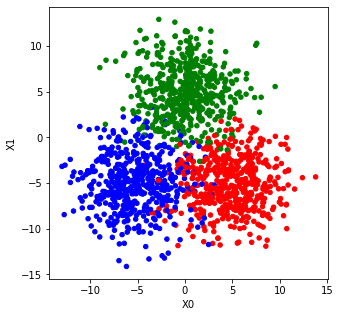

In [41]:
#> クラスターを色分けしてプロット
df = pd.DataFrame(np.hstack([X,labels_true.reshape(len(labels_true),1)]), columns=["X0","X1","label"])
col = df.label.map({0:'b', 1:'g', 2:'r'})
df.plot(x='X0', y='X1', kind='scatter', c=col, colorbar=False, figsize=(5,5))

### H2O-3によるクラスタリング（k-means）

In [42]:
import h2o
print(h2o.__version__)

3.32.0.2


In [43]:
from h2o.estimators.kmeans import H2OKMeansEstimator

APIドキュメント：[H2OKMeansEstimator](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2okmeansestimator)

In [44]:
#> H2Oクラスターの開始
h2o.init(url='http://localhost:54321')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         4 hours 34 mins
H2O_cluster_timezone:       Asia/Tokyo
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.0.2
H2O_cluster_version_age:    1 month and 5 days
H2O_cluster_name:           H2O_from_python_YShimada_MBP16_jmzf64
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    8.000 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.6.12 final
--------------------------  ------------------------------------------------------------------

#### クラスター数を指定し、クラスタリングを実施

In [45]:
#> データの準備： pandas DataFrameからH2O Frameへ変換
print(type(df))
df_h2o = h2o.H2OFrame.from_python(df)
print(type(df_h2o))

<class 'pandas.core.frame.DataFrame'>
Parse progress: |█████████████████████████████████████████████████████████| 100%
<class 'h2o.frame.H2OFrame'>


In [46]:
#> クラスター数（k）を明示的に指定し、モデルインスタンスを作成
km_k3 = H2OKMeansEstimator(standardize=True, 
                                                        estimate_k=False,       # estimate_kをFalseとし、
                                                        k=3,                               # kにクラスター数を指定
                                                        seed=123)
km_k3

No model trained yet


In [47]:
#> モデル学習（クラスター中心点の推定）
km_k3.train(x=["X0","X1"], training_frame=df_h2o)
km_k3

kmeans Model Build progress: |████████████████████████████████████████████| 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1608606187338_10


Model Summary: 


number_of_rows  number_of_clusters  number_of_categorical_columns  \
0            1500.0                 3.0                            0.0   

   number_of_iterations  within_cluster_sum_of_squares  total_sum_of_squares  \
0                   7.0                     838.863783                2998.0   

   between_cluster_sum_of_squares  
0                     2159.136217



ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 838.8637840019569
Total Sum of Square Error to Grand Mean: 2998.000005680511
Between Cluster Sum of Square Error: 2159.136221678554

Centroid Statistics: 


centroid   size  within_cluster_sum_of_squares
0         1.0  491.0                     271.723761
1         2.0  514.0                     283.424398
2         3.0  495.0                     283.715626


Scoring History: 


timestamp    duration  iterations  \
0    2020-12-22 16:37:23   0.003 sec         0.0   
1    2020-12-22 16:37:23   0.007 sec         1.0   
2    2020-12-22 16:37:23   0.009 sec         2.0   
3    2020-12-22 16:37:23   0.011 sec         3.0   
4    2020-12-22 16:37:23   0.012 sec         4.0   
5    2020-12-22 16:37:23   0.013 sec         5.0   
6    2020-12-22 16:37:23   0.015 sec         6.0   
7    2020-12-22 16:37:23   0.015 sec         7.0   

   number_of_reassigned_observations  within_cluster_sum_of_squares  
0                                NaN                            NaN  
1                             1500.0                    2188.208893  
2                              198.0                     977.289399  
3                               66.0                     860.884308  
4                               32.0                     842.698848  
5                                8.0                     839.068312  
6                                2.0                     838.875864  
7                                0.0                     838.863783

In [48]:
#> モデルパラメータの確認
km_k3.actual_params

{'model_id': 'KMeans_model_python_1608606187338_10',
 'training_frame': 'Key_Frame__upload_99f5f79cabb8c2d1db660f3fe2d14f1d.hex',
 'validation_frame': None,
 'nfolds': 0,
 'keep_cross_validation_models': True,
 'keep_cross_validation_predictions': False,
 'keep_cross_validation_fold_assignment': False,
 'fold_assignment': None,
 'fold_column': None,
 'ignored_columns': ['label'],
 'ignore_const_cols': True,
 'score_each_iteration': False,
 'k': 3,
 'estimate_k': False,
 'user_points': None,
 'max_iterations': 10,
 'standardize': True,
 'seed': 123,
 'init': 'Furthest',
 'max_runtime_secs': 0.0,
 'categorical_encoding': 'Enum',
 'export_checkpoints_dir': None,
 'cluster_size_constraints': None}

In [49]:
#> 各クラスターの中心点
km_k3.centers()
# ほぼほぼ一致

[[-5.412334893253637, -5.188529274670621],
 [4.839466557029585, -4.960123322911371],
 [-0.022415211001095184, 5.110166507152485]]

In [50]:
#> 各データ点をクラスターに振り分ける
pred_k3 = km_k3.predict(df_h2o)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [51]:
#> 振り分けたクラスター番号を元データに結合
df_h2o['label_pred'] = pred_k3
df_h2o.head(8)

X0 X1 label label_pred 
 
 
 5.13692 2.62365 1 2 
 7.47838 -5.17327 2 1 
 1.37875 5.84017 1 2 
 -3.5887 -4.06566 0 0 
 -3.65541 0.0885447 0 0 
 -3.15776 -2.23338 0 0 
 4.55709 -1.60456 2 1 
 -4.80045 -4.09258 0 0

<AxesSubplot:xlabel='X0', ylabel='X1'>

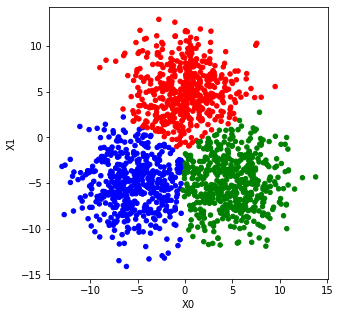

In [52]:
#> クラスター分析結果をプロット
df2 = df_h2o.as_data_frame()
col = df2.label_pred.map({0:'b', 1:'g', 2:'r'})
df2.plot(x='X0', y='X1', kind='scatter', c=col, colorbar=False, figsize=(5,5))

#### 検証データによる、クラスター数の決定

In [75]:
#> データの準備
# pandas DataFrameからH2O Frameへ変換
df_h2o = h2o.H2OFrame.from_python(df)
# 学習、検証データへの分割
df_h2o_train, df_h2o_valid = df_h2o.split_frame(ratios=[.7], seed=123)
print("学習データの次元（ラベル付）：", df_h2o_train.shape)
print("検証データの次元（ラベル付）：", df_h2o_valid.shape)

Parse progress: |█████████████████████████████████████████████████████████| 100%
学習データの次元（ラベル付）： (1061, 3)
検証データの次元（ラベル付）： (439, 3)


In [76]:
#> モデルインスタンスの作成
km_auto = H2OKMeansEstimator(standardize=True, 
                                                           estimate_k=True,    # estimate_kをTrueとし、
                                                           k = 5)                       # 探索する最大クラスター数を指定する
km_auto

No model trained yet


In [77]:
km_auto.train(x=["X0","X1"], 
                          training_frame=df_h2o_train, 
                          validation_frame=df_h2o_valid)
km_auto

kmeans Model Build progress: |████████████████████████████████████████████| 100%
Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1608606187338_18


Model Summary: 


number_of_rows  number_of_clusters  number_of_categorical_columns  \
0            1061.0                 1.0                            0.0   

   number_of_iterations  within_cluster_sum_of_squares  total_sum_of_squares  \
0                   2.0                         2120.0                2120.0   

   between_cluster_sum_of_squares  
0                             0.0



ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 2120.000009606299
Total Sum of Square Error to Grand Mean: 2120.0000081234703
Between Cluster Sum of Square Error: -1.48282879308681e-06

Centroid Statistics: 


centroid    size  within_cluster_sum_of_squares
0         1.0  1061.0                     2120.00001


ModelMetricsClustering: kmeans
** Reported on validation data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 837.0474152940784
Total Sum of Square Error to Grand Mean: 836.1480293852819
Between Cluster Sum of Square Error: -0.8993859087964893

Centroid Statistics: 


centroid   size  within_cluster_sum_of_squares
0         1.0  439.0                     837.047415


Scoring History: 


timestamp    duration  iterations  number_of_clusters  \
0    2020-12-22 16:49:59   0.003 sec         0.0                 0.0   
1    2020-12-22 16:49:59   0.005 sec         1.0                 1.0   
2    2020-12-22 16:49:59   0.006 sec         2.0                 1.0   

   number_of_reassigned_observations  within_cluster_sum_of_squares  
0                                NaN                            NaN  
1                             1061.0                    4148.567488  
2                                0.0                    2120.000000

In [56]:
#>>> うまくクラスター数が決定されていない、、。

In [68]:
#km_auto.actual_params

In [78]:
#> 各クラスターの中心点
km_auto.centers()

[[-0.12253473384303527, -1.6367675820702374]]